In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = 'data/krstozbor (1).jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

In [ ]:
def show_pic(img, gray=False):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    if gray:
        ax.imshow(img,cmap='gray')
    else:
        ax.imshow(img)

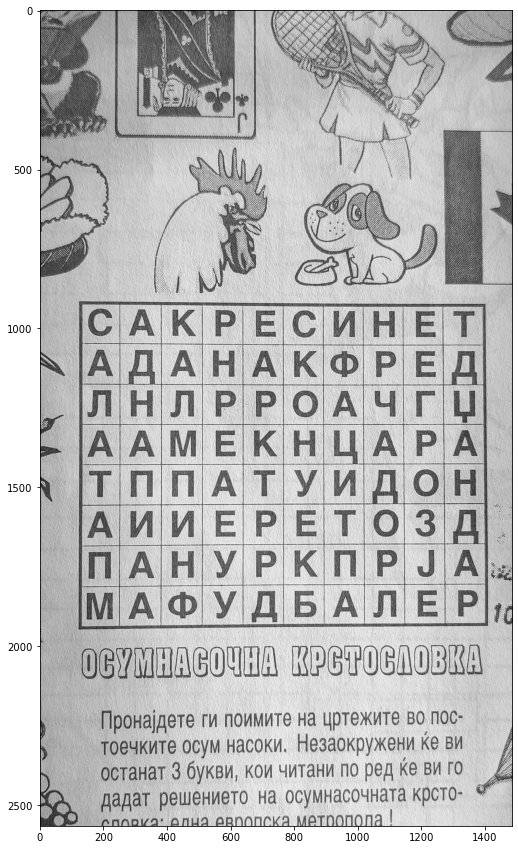

In [ ]:
show_pic(img_gray,True)

### Histogram equalizaiton

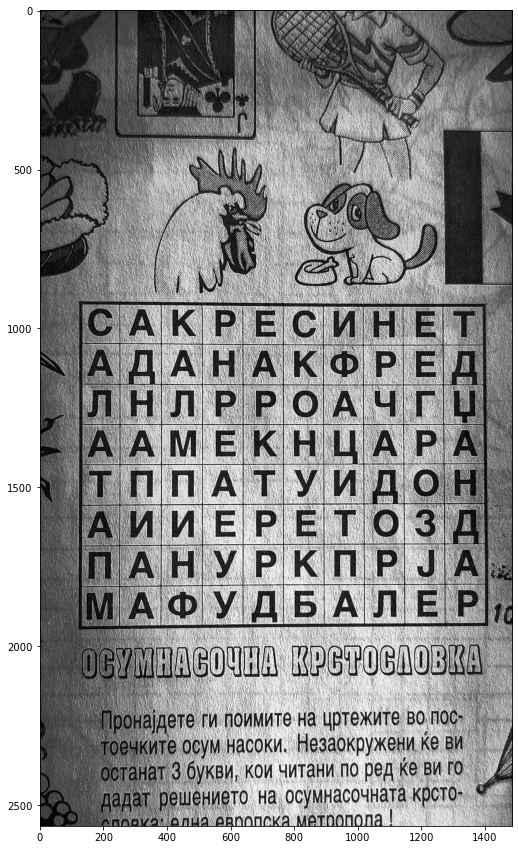

In [ ]:
hist_equal = cv2.equalizeHist(img_gray)
show_pic(hist_equal,True)

### Thresholding

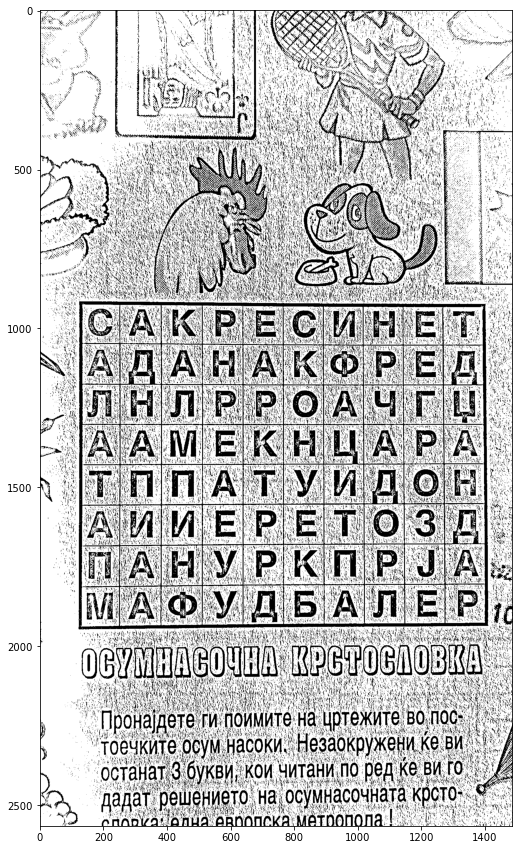

In [ ]:
thresh_img = cv2.adaptiveThreshold(img_gray,255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,25, 30)
show_pic(thresh_img, gray=True)

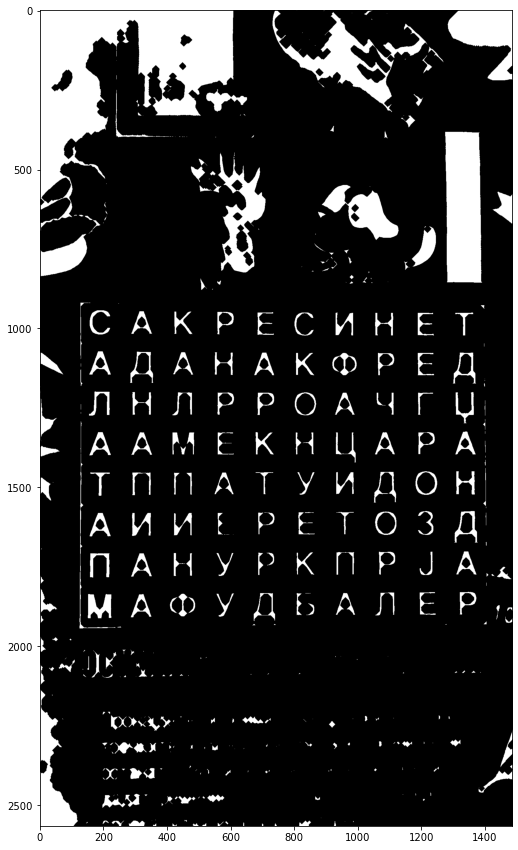

In [25]:
ret, thresh_img = cv2.threshold(morphed_elipse_close_inv1,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show_pic(thresh_img, gray=True)

### Corner detection

In [ ]:
# CORNERS
corners = cv2.goodFeaturesToTrack(thresh_img, 20, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),15,(255,100,33), -1)
show_pic(img,False)

In [ ]:
#Chessbord pattern
found, corners = cv2.findChessboardCorners(img, (7,7))
print(found)
found, corners = cv2.findChessboardCorners(img, (6,6))
print(found)

### Blurring

In [67]:
img_gray.shape

(2565, 1485)

In [66]:
img_gray.shape[0] + img_gray.shape[1]

4050

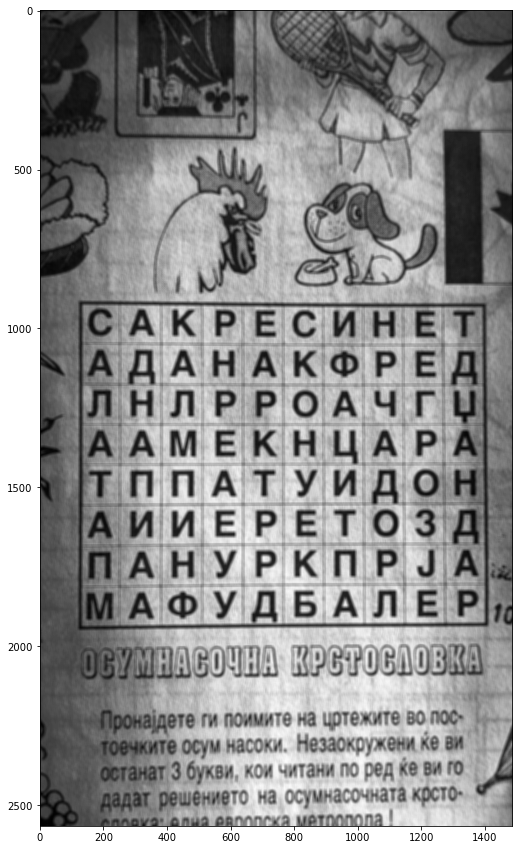

In [ ]:
blurred_img = cv2.blur(img_gray, (11,11))
show_pic(blurred_img,gray=True)

### Morphological operators

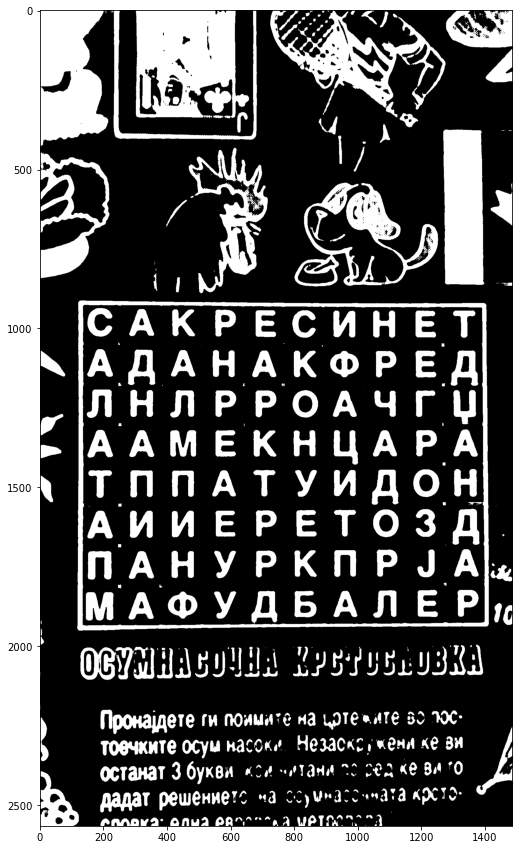

In [41]:
show_pic(thresh_img, True)

In [31]:
thresh_img = cv2.bitwise_not(blurred_img)

In [11]:
elipse_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

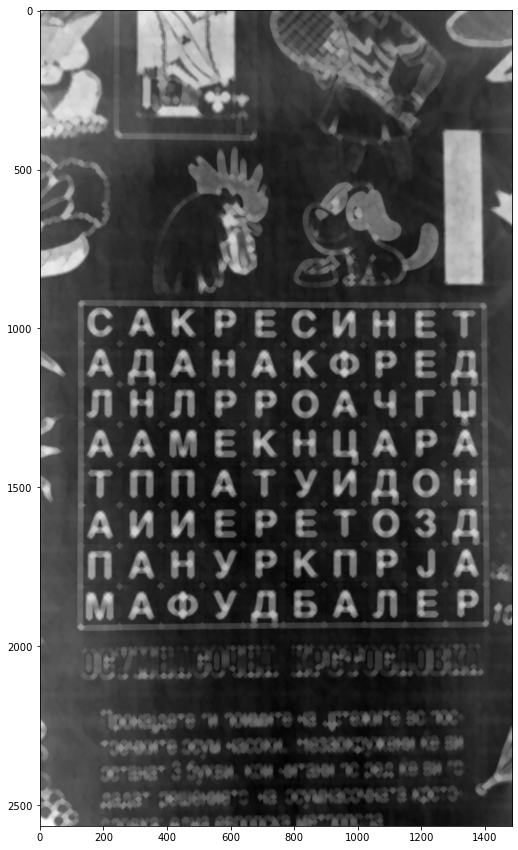

In [35]:
morphed_elipse = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, elipse_kernel, iterations=8)
show_pic(morphed_elipse, True)

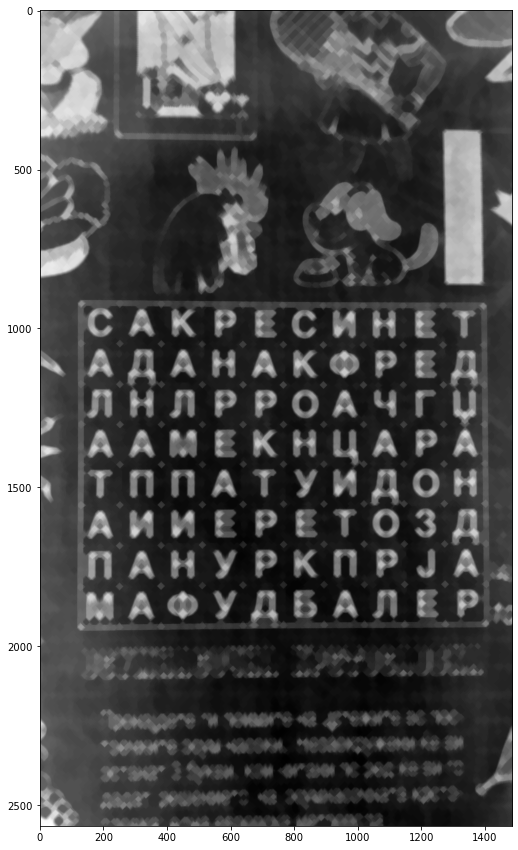

In [36]:
morphed_elipse_close_inv = cv2.morphologyEx(morphed_elipse, cv2.MORPH_CLOSE, elipse_kernel, iterations=8)
show_pic(morphed_elipse_close_inv, True)

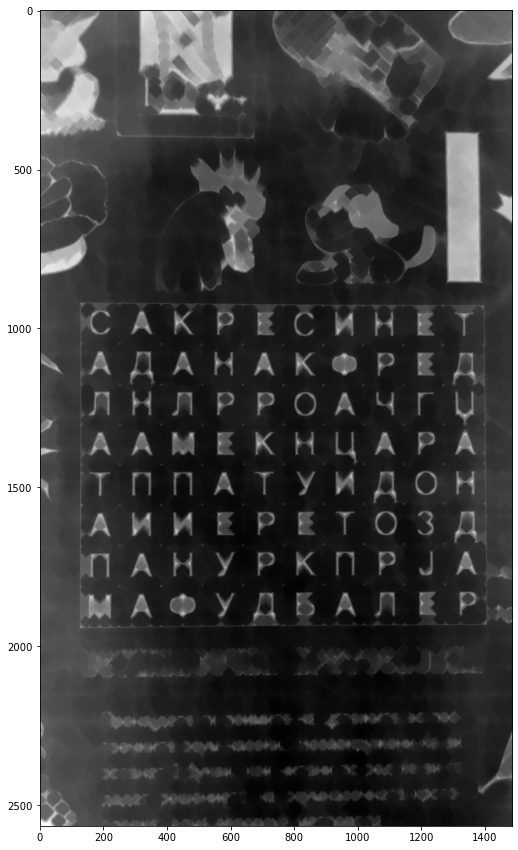

In [37]:
morphed_elipse_close_inv1 = cv2.morphologyEx(morphed_elipse_close_inv, cv2.MORPH_ERODE, elipse_kernel, iterations=8)
show_pic(morphed_elipse_close_inv1, True)

In [32]:
cv2.imwrite('data/myoriginal.jpg', morphed_elipse_close_inv1)

True

In [78]:
img_gray_inv = cv2.bitwise_not(img_gray)

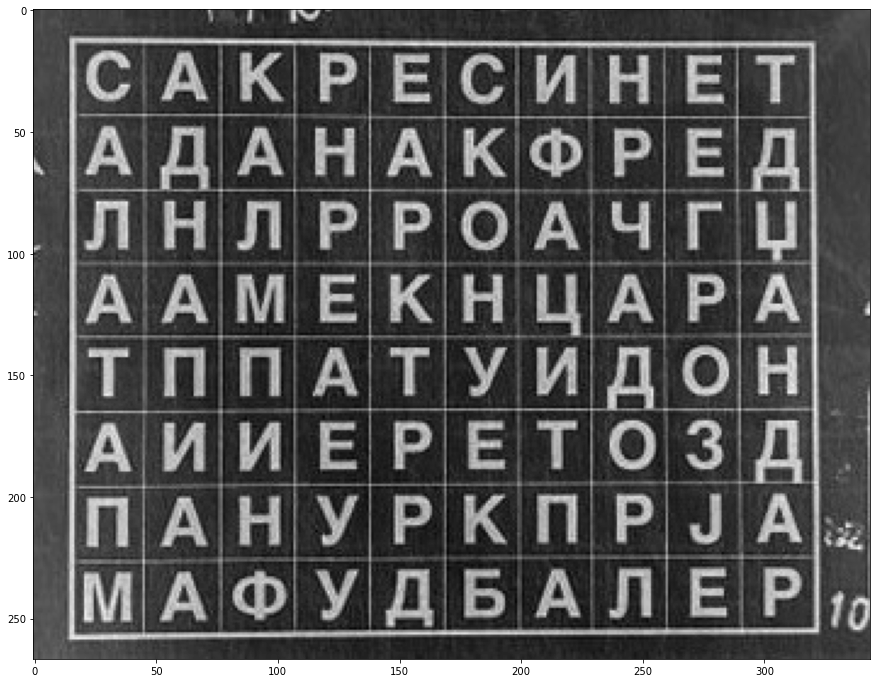

In [80]:
show_pic(img_gray_inv,True)

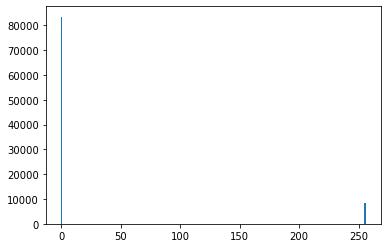

In [100]:
plt.hist(thresh_img.ravel(),256, [0,256]);
plt.show()

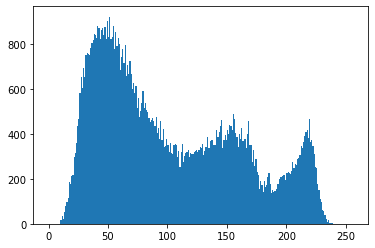

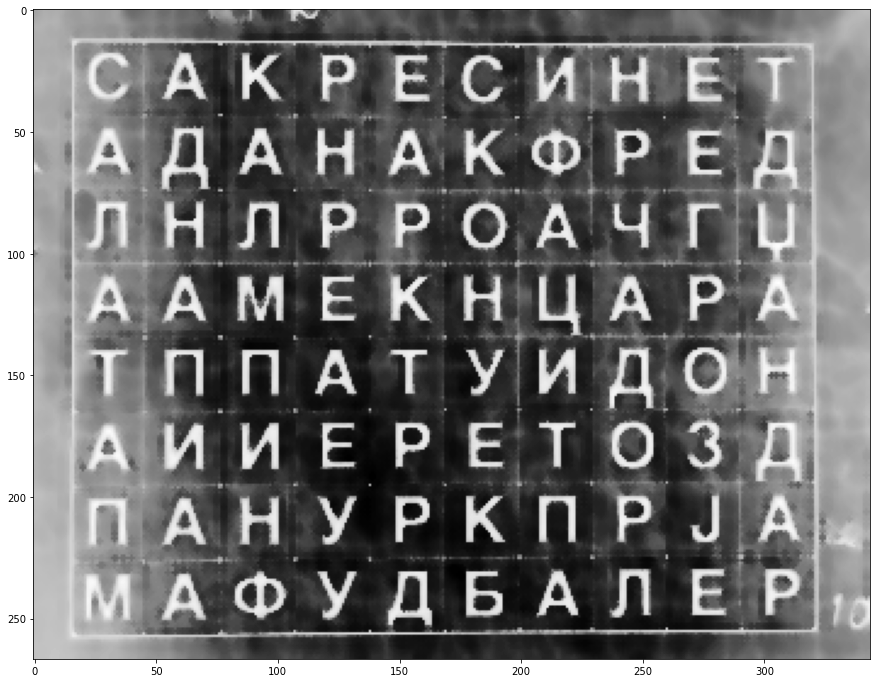

In [76]:
plt.hist(morphed_elipse_close.ravel(),256, [0,256]);
show_pic(morphed_elipse_close, True)
plt.show()

#######################################

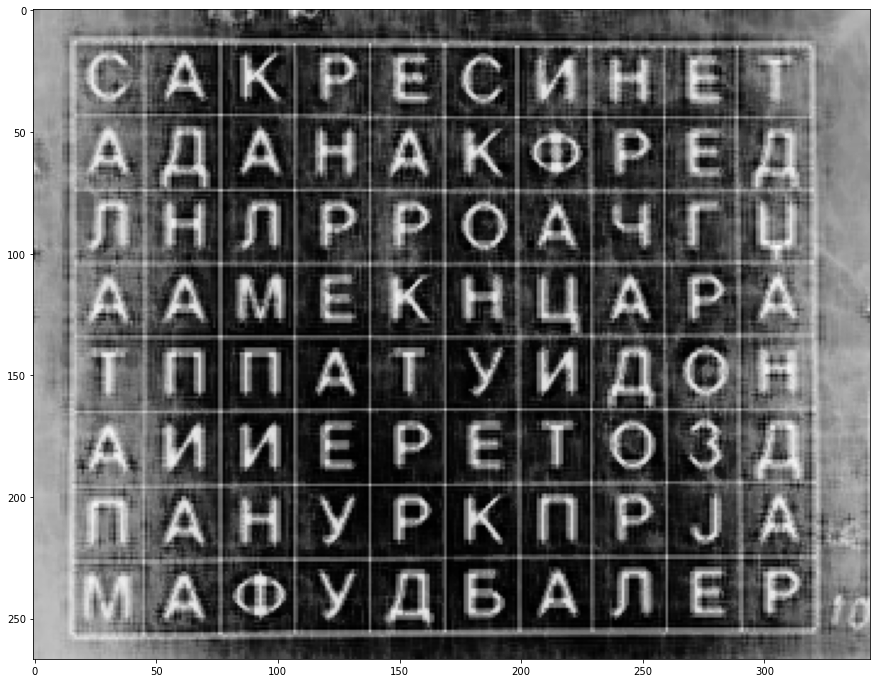

In [46]:
added = cv2.addWeighted(src1=morphed_hor, alpha=0.5, src2=morphed_ver, beta=0.5, gamma=0)
show_pic(added, True)

### Contours

In [114]:
# Finding contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [129]:
# Draw Contours
external_contours = np.zeros(img_gray.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == 51:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, (255,0,0), -1)

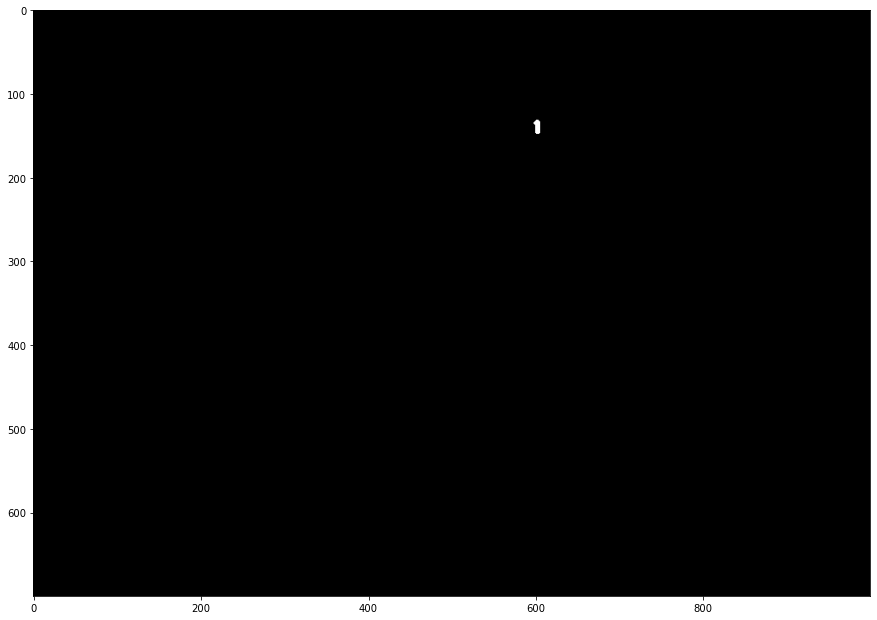

In [131]:
show_pic(external_contours,gray=True)

### Gradients (sobel)

In [19]:
# Gradients
sobelx = cv2.Sobel(thresh_img, ddepth=cv2.CV_64F, dx=1, dy=0)
sobely = cv2.Sobel(thresh_img, ddepth=cv2.CV_64F, dx=0, dy=1)

In [20]:
combined_sobel = cv2.addWeighted(src1=sobelx, alpha=0.5, src2=sobely, beta=0.5,gamma=0, dtype=cv2.CV_64F)

In [21]:
combined_sobel

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

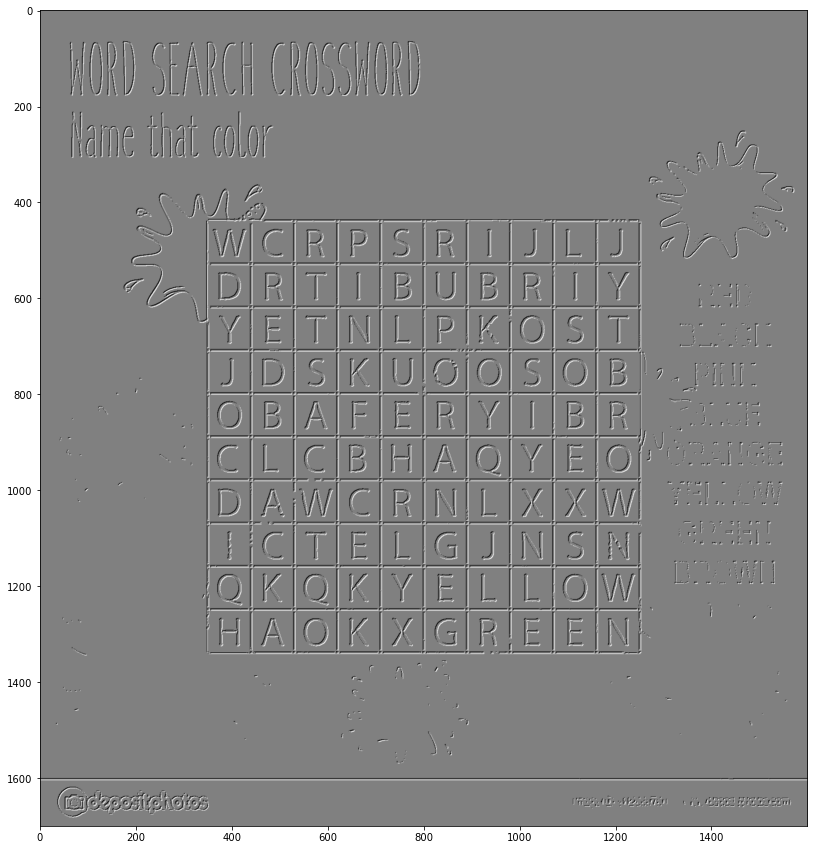

In [13]:
show_pic(combined_sobel, gray=True)

In [26]:
casted_sobel = combined_sobel.astype(np.uint8)

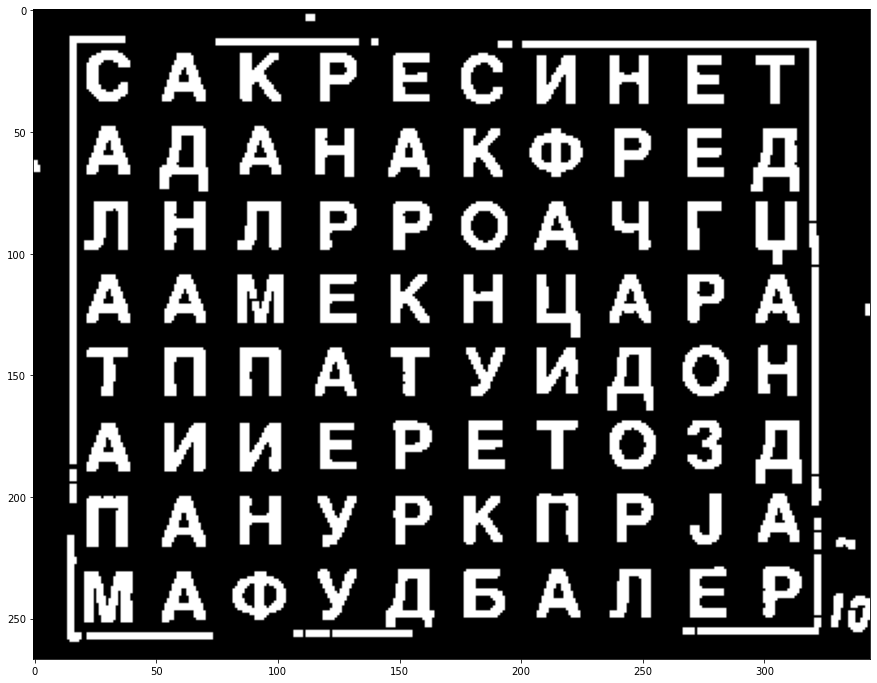

In [42]:
gradient = cv2.morphologyEx(thresh_img, cv2.MORPH_DILATE, kernel)
show_pic(gradient, gray=True)

In [35]:
#Chessbord pattern
found, corners = cv2.findChessboardCorners(gradient, (10,10))
print(found)
found, corners = cv2.findChessboardCorners(gradient, (9,9))
print(found)

False
False
